In [1]:
# Importing all required libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.linear_model import LinearRegression
from dpp.data import load_from_kaggle

/Users/ebbykuriakose/Desktop/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download a dataset from Kaggle and save it to the local raw data folder.
# The dataset name is extracted automatically from the Kaggle link.

dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

# download dataset and return list of file paths
files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


In [3]:
files

['Car_sales.csv']

In [4]:
# Load and Preview Dataset
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
# Dataset overview: shape, summary stats, and duplicates
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)

# Column-level details: data types, missing values, unique counts, and sample values
pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })

'Shape'

(157, 16)

'Description'

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.00,121.00,155.00,156.00,156.00,156.00,156.00,156.00,155.00,156.00,154.00,155.00
mean,53.00,18.07,27.39,3.06,185.95,107.49,71.15,187.34,3.38,17.95,23.84,77.04
std,68.03,11.45,14.35,1.04,56.70,7.64,3.45,13.43,0.63,3.89,4.28,25.14
min,0.11,5.16,9.24,1.00,55.00,92.60,62.60,149.40,1.90,10.30,15.00,23.28
25%,14.11,11.26,18.02,2.30,149.50,103.00,68.40,177.58,2.97,15.80,21.00,60.41
50%,29.45,14.18,22.80,3.00,177.50,107.00,70.55,187.90,3.34,17.20,24.00,72.03
75%,67.96,19.88,31.95,3.58,215.00,112.20,73.43,196.12,3.80,19.58,26.00,89.41
max,540.56,67.55,85.50,8.00,450.00,138.70,79.90,224.50,5.57,32.00,45.00,188.14


'Duplicates'

np.int64(0)

,Data Types,Unique Values,Sample Values
Manufacturer,object,30,"[Pontiac, Volvo, Nissan]"
Model,object,156,"[LW, Explorer, CL500]"
Sales_in_thousands,float64,157,"[76.029, 65.119, 15.943]"
__year_resale_value,float64,117,"[10.185, 10.595, 12.025]"
Vehicle_type,object,2,"[Passenger, Passenger, Passenger]"
Price_in_thousands,float64,152,"[11.528, 69.725, 16.54]"
Engine_size,float64,31,"[3.8, 4.0, 3.2]"
Horsepower,float64,66,"[119.0, 150.0, 193.0]"
Wheelbase,float64,88,"[105.3, 107.0, 119.0]"
Width,float64,78,"[67.5, 66.5, 75.5]"


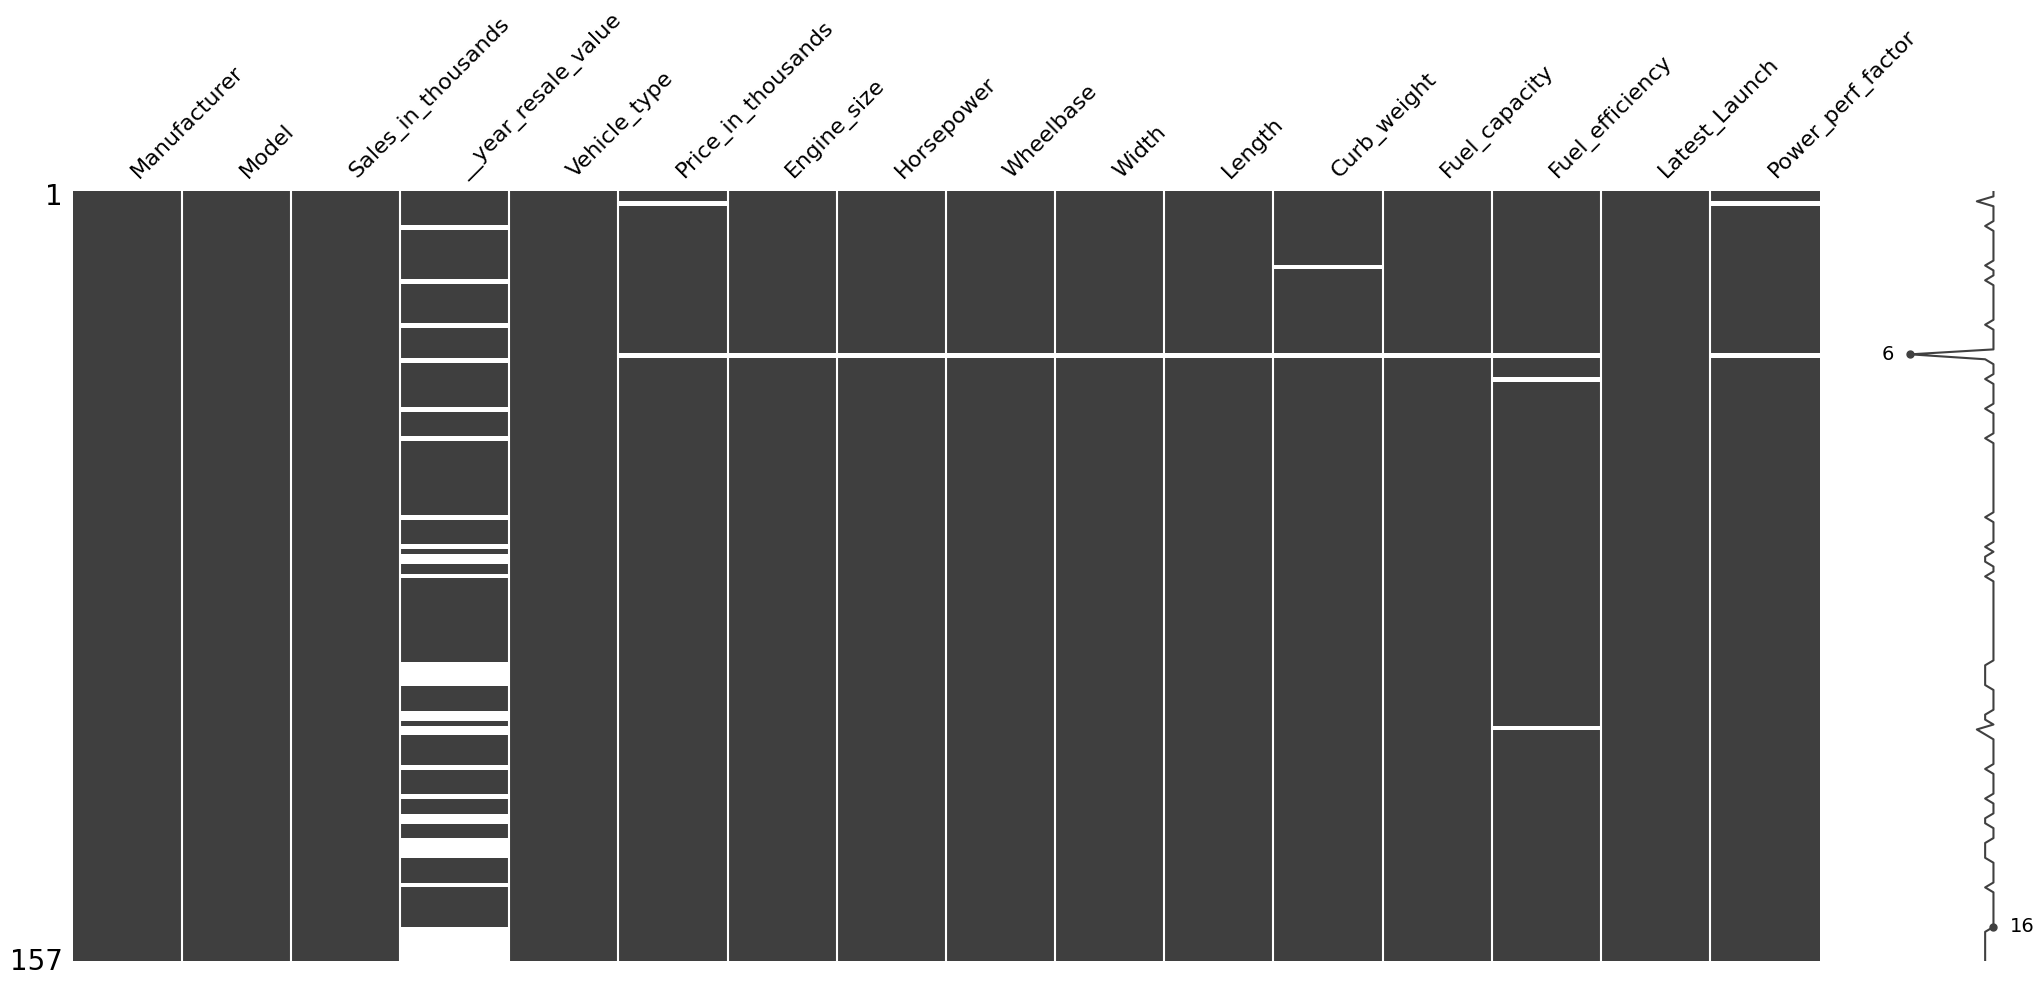

In [6]:
# Visualizing missing values in the dataset
msno.matrix(df)
plt.show()

In [7]:
# Rename column '__year_resale_value' to 'Year_resale_value' if it exists
if "__year_resale_value" in df.columns:
    df.rename(columns={"__year_resale_value": "Year_resale_value"}, inplace=True)

In [8]:
# Converted specified columns to categorical type
category_col = ["Manufacturer","Model","Vehicle_type"]
for col in category_col:
    df[col] = df[col].astype("category")

# Convert 'Latest_Launch' column to datetime, invalid parsing set as NaT (Not a Time)
df["Latest_Launch"] = pd.to_datetime(df["Latest_Launch"], errors = "coerce")

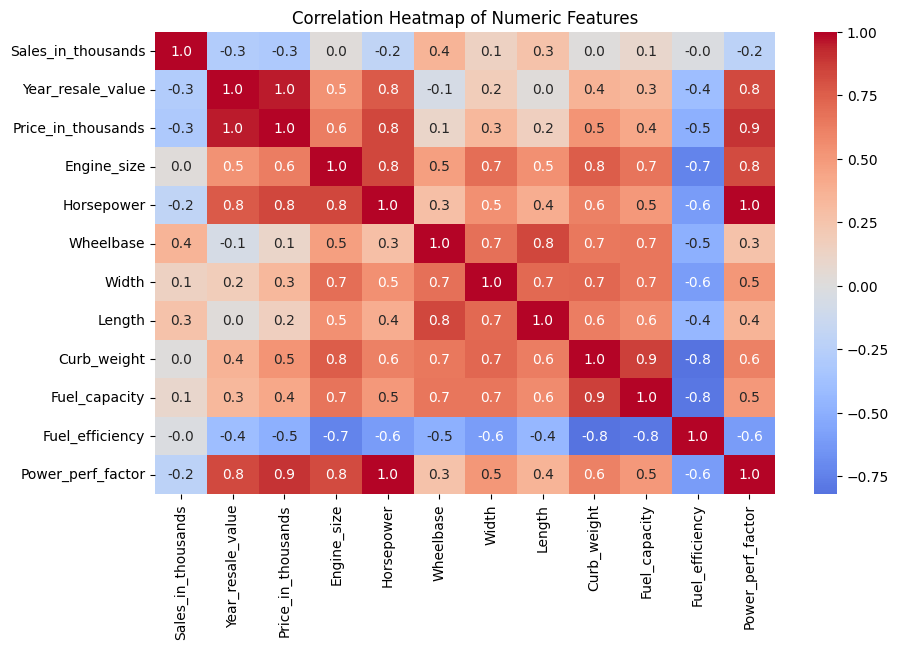

In [9]:
# Plot a heatmap of correlations between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, fmt='.1f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [10]:
# Keep only rows that have fewer than 3 missing (NaN) values
df = df[df.isna().sum(axis=1) < 3]

In [11]:
# Extracts highly correlated columns for each numeric feature.

# Correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()  #
threshold = 0.6

# Create a boolean mask of correlations above threshold (excluding diagonal)
mask = (corr_matrix > threshold) & (~np.eye(corr_matrix.shape[0], dtype=bool))

# Extract dependent columns as a dictionary
dependent_columns = {col: list(corr_matrix.columns[mask[col]]) for col in corr_matrix.columns}

# Convert dictionary to a DataFrame (simplest method)
dependent_df = pd.DataFrame(list(dependent_columns.items()), columns=['Column', 'Dependent Columns'])

# Show full content
pd.set_option('display.max_colwidth', None)
print(dependent_df)


                Column  \
0   Sales_in_thousands   
1    Year_resale_value   
2   Price_in_thousands   
3          Engine_size   
4           Horsepower   
5            Wheelbase   
6                Width   
7               Length   
8          Curb_weight   
9        Fuel_capacity   
10     Fuel_efficiency   
11   Power_perf_factor   

                                                                                          Dependent Columns  
0                                                                                                        []  
1                                                       [Price_in_thousands, Horsepower, Power_perf_factor]  
2                                           [Year_resale_value, Engine_size, Horsepower, Power_perf_factor]  
3   [Price_in_thousands, Horsepower, Width, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor]  
4     [Year_resale_value, Price_in_thousands, Engine_size, Curb_weight, Fuel_efficiency, Power_perf_factor]  
5

In [12]:
# Filled missing values in 'Price_in_thousands' and 'Power_perf_factor' with their respective medians
df["Price_in_thousands"] = df["Price_in_thousands"].fillna(df["Price_in_thousands"].median())
df["Power_perf_factor"] = df["Power_perf_factor"].fillna(df["Power_perf_factor"].median())

In [13]:
# Function to impute missing values in numeric columns using Linear Regression 
# (predicts missing target values from related features and updates the dataframe)

def impute_with_regression(df, target_col, features):
    """
    Impute missing values in target_col using Linear Regression on given features.
    """
    # Split data into rows with and without target_col
    train_data = df[df[target_col].notnull()]
    test_data = df[df[target_col].isnull()]
    
    # If there are no missing values, just return
    if test_data.empty:
        print(f"No missing values in {target_col}")
        return df
    
    # Save indices of missing rows
    missing_idx = test_data.index
    
    # Prepare training data
    X_train = train_data[features]
    y_train = train_data[target_col]
    
    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict missing values
    X_test = test_data[features]
    predicted_values = model.predict(X_test)
    
    # Assign predictions back
    df.loc[missing_idx, target_col] = predicted_values
    
    #print(f"Rows imputed in '{target_col}':")
    #display(df.loc[missing_idx])
    
    return df


In [14]:
# Impute missing values for multiple columns using the defined regression function

# Define features (you can adjust per target column if needed)
features_curb_weight = ["Length", "Width", "Engine_size", "Horsepower", "Wheelbase", "Fuel_capacity"]
features_fuel_efficiency = ["Length", "Width", "Engine_size", "Horsepower", "Wheelbase", "Fuel_capacity"]
features_resale_value = ["Length", "Width", "Engine_size", "Horsepower", "Wheelbase", "Fuel_capacity"]

# Call the function for each column
df = impute_with_regression(df, "Curb_weight", features_curb_weight)
df = impute_with_regression(df, "Fuel_efficiency", features_fuel_efficiency)
df = impute_with_regression(df, "Year_resale_value", features_resale_value)

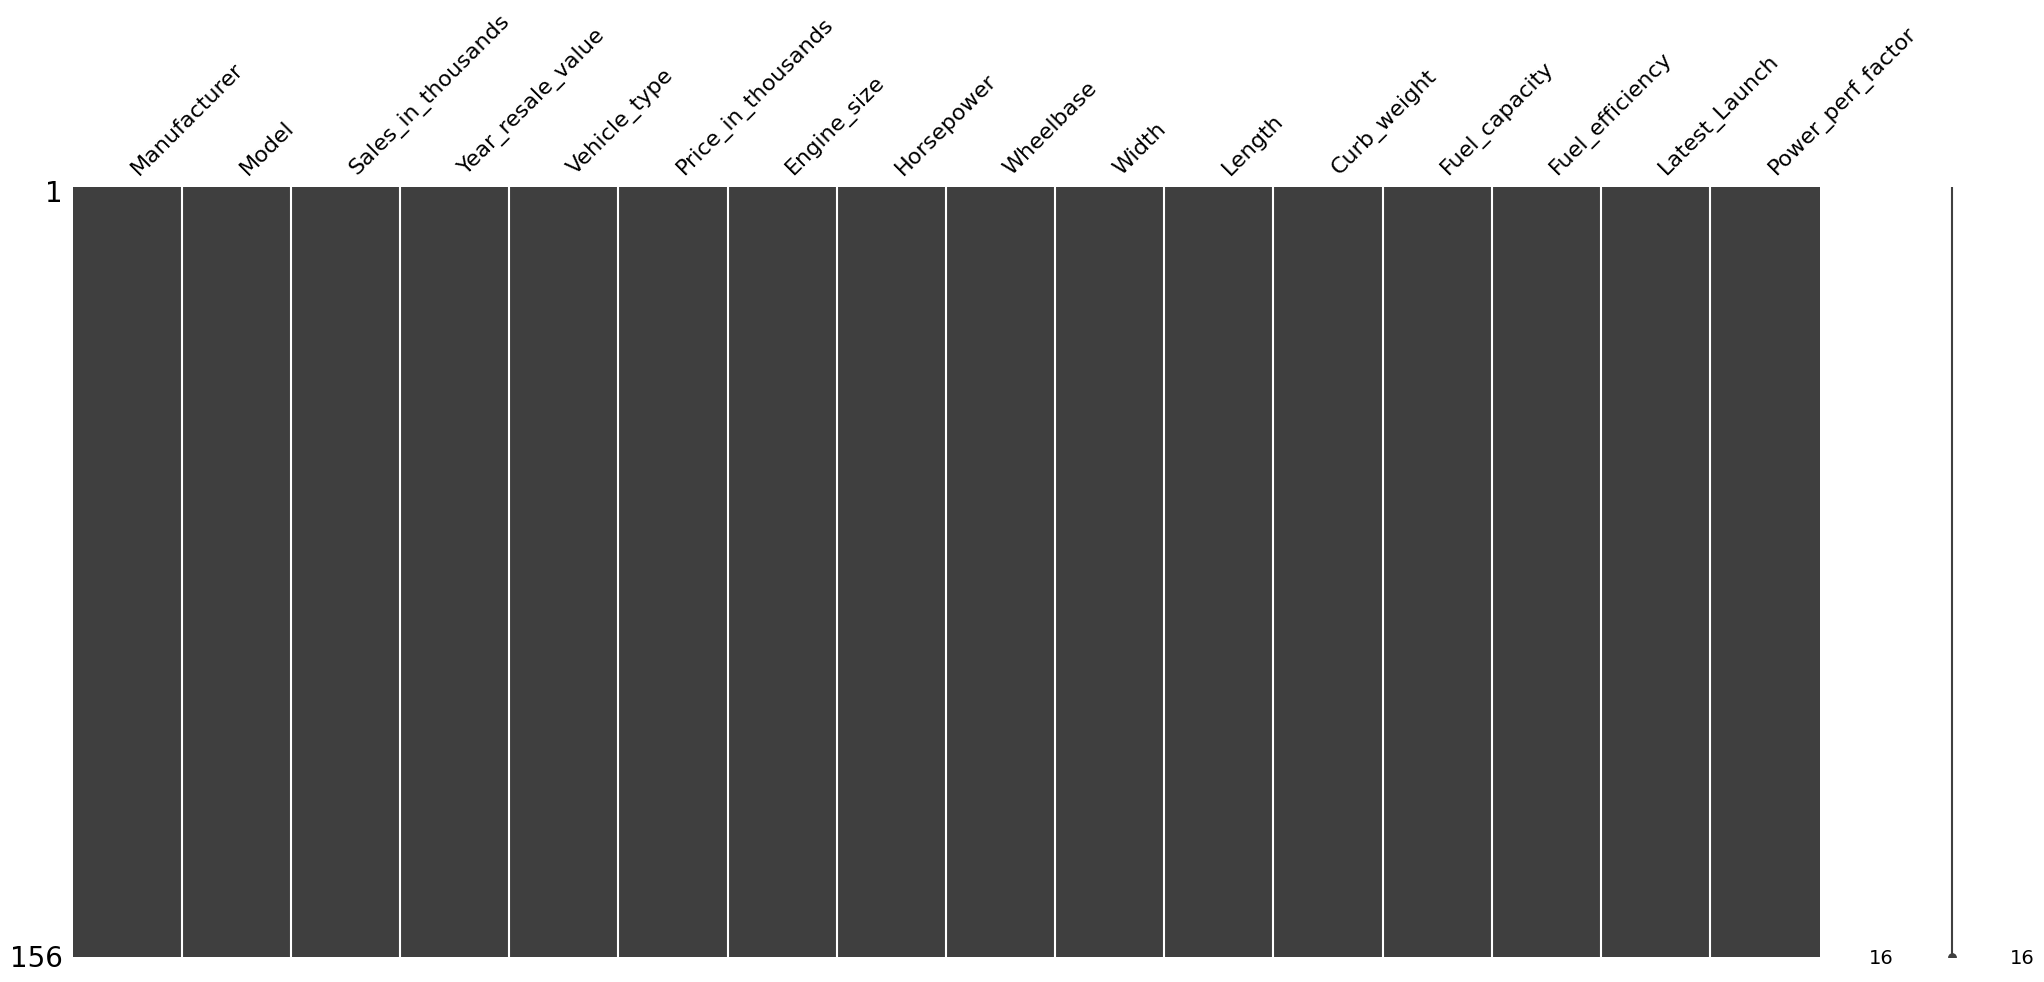

In [ ]:
# START FROM HERE
msno.matrix(df)
plt.show()


Column: Sales_in_thousands
Skewness: 3.40
Highly right-skewed


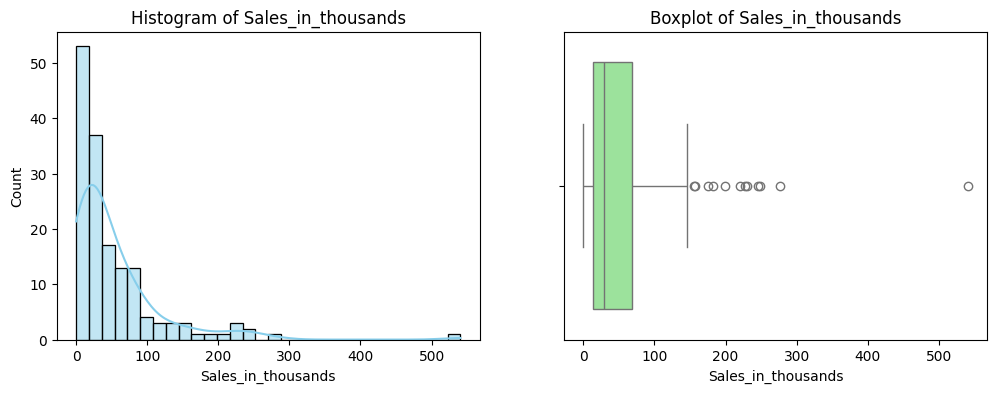


Column: Year_resale_value
Skewness: 2.76
Highly right-skewed


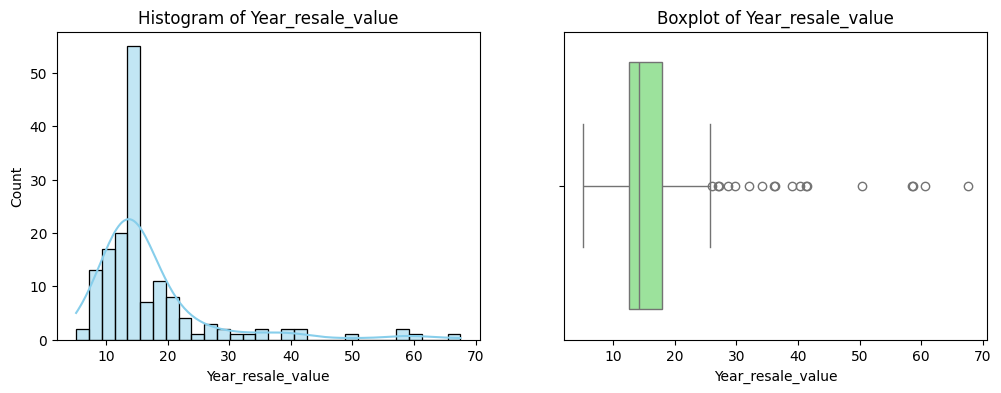


Column: Price_in_thousands
Skewness: 1.78
Highly right-skewed


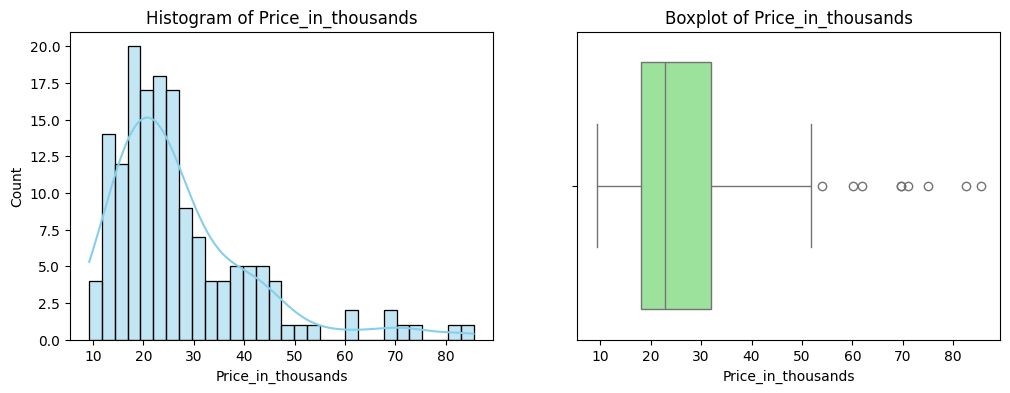


Column: Engine_size
Skewness: 1.10
Highly right-skewed


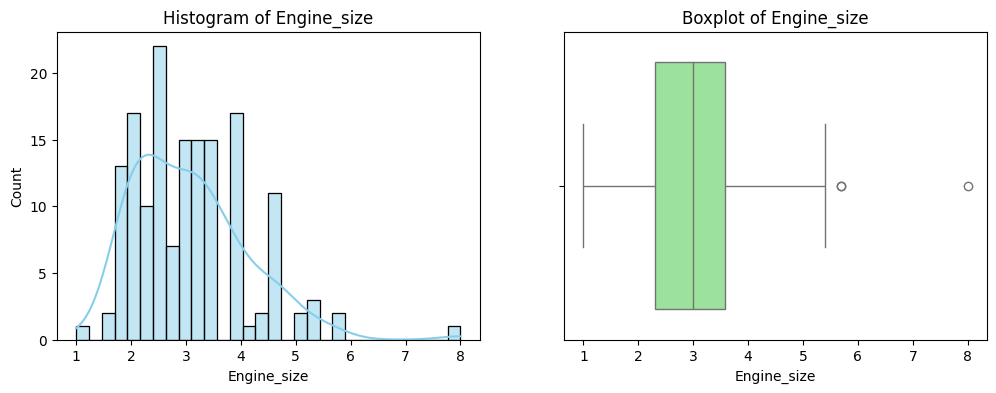


Column: Horsepower
Skewness: 1.00
Highly right-skewed


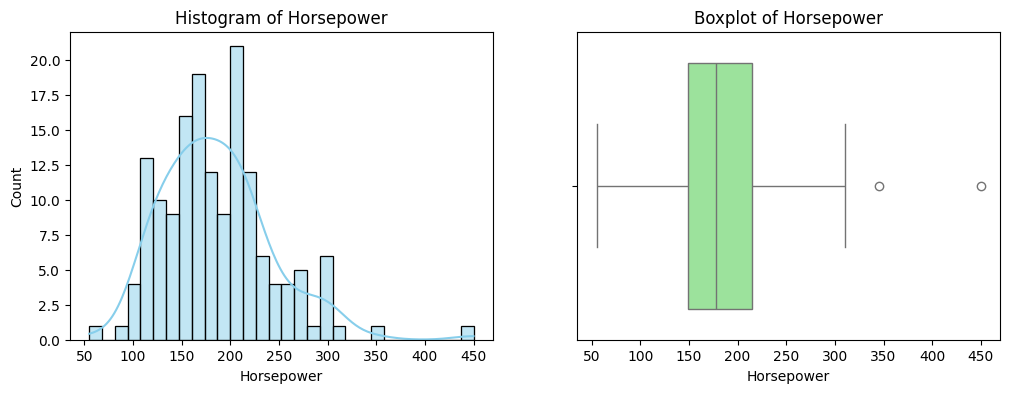


Column: Wheelbase
Skewness: 0.97
Moderately right-skewed


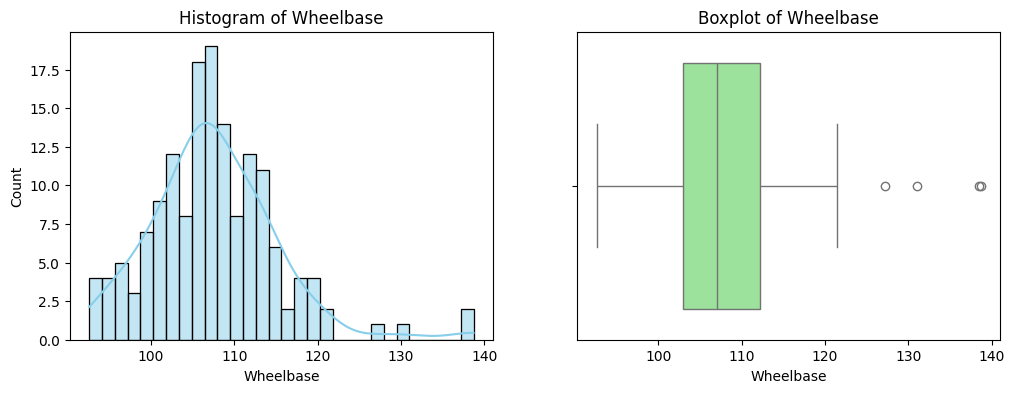


Column: Width
Skewness: 0.48
Approximately symmetric


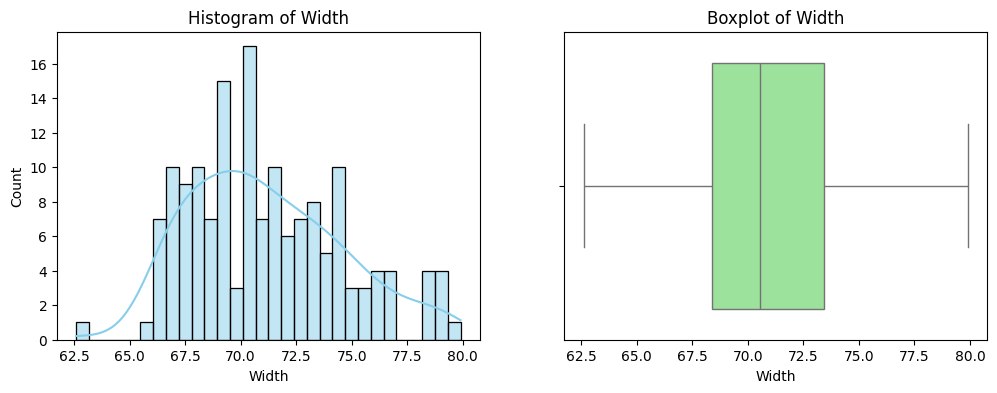


Column: Length
Skewness: -0.06
Approximately symmetric


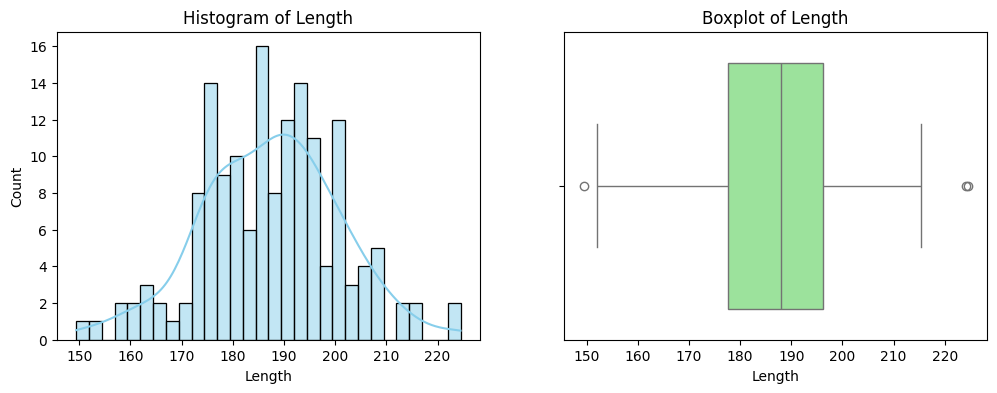


Column: Curb_weight
Skewness: 0.70
Moderately right-skewed


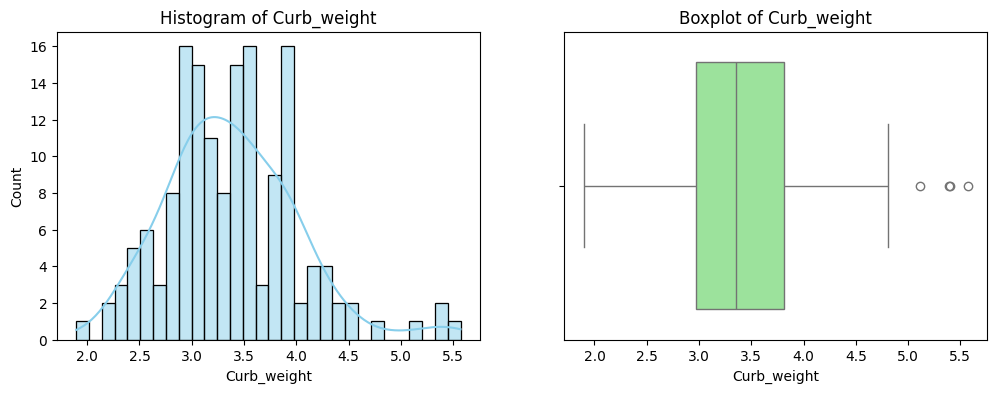


Column: Fuel_capacity
Skewness: 1.14
Highly right-skewed


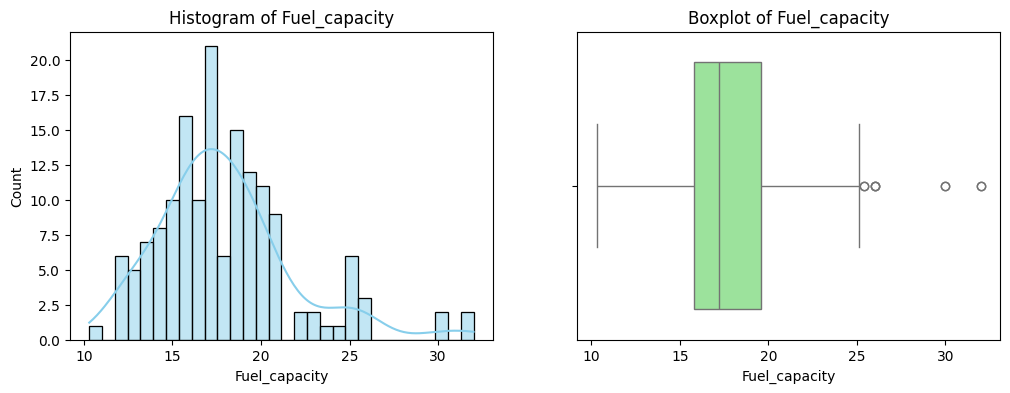


Column: Fuel_efficiency
Skewness: 0.70
Moderately right-skewed


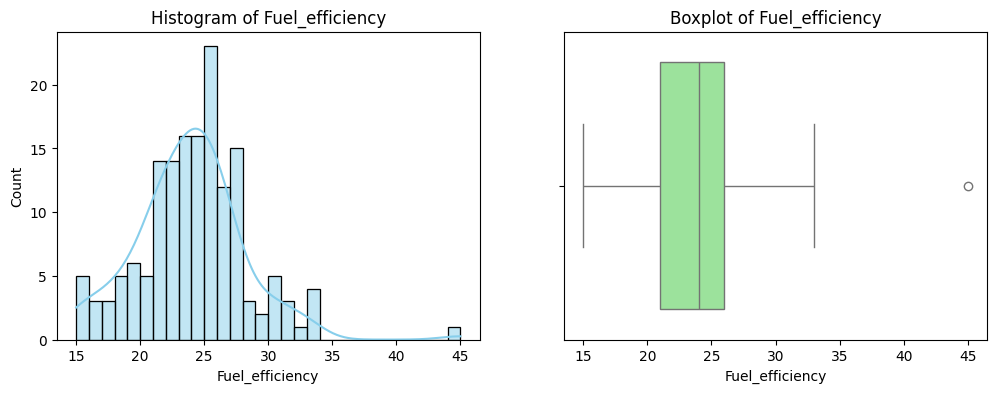


Column: Power_perf_factor
Skewness: 1.08
Highly right-skewed


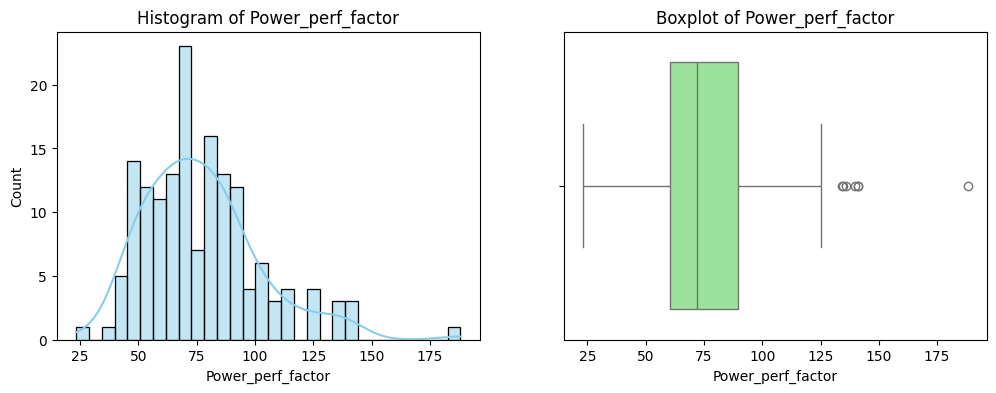

In [15]:
# Univariate Analysis
# Numeric Columns Analysis
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    skewness = df[col].skew()

    print(f"\nColumn: {col}")
    print(f"Skewness: {skewness:.2f}")
    
    if skewness > 1:
        print("Highly right-skewed")
    elif skewness > 0.5:
        print("Moderately right-skewed")
    elif skewness < -1:
        print("Highly left-skewed")
    elif skewness < -0.5:
        print("Moderately left-skewed")
    else:
        print("Approximately symmetric")
    
    plt.figure(figsize=(12,4))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    
    plt.show()


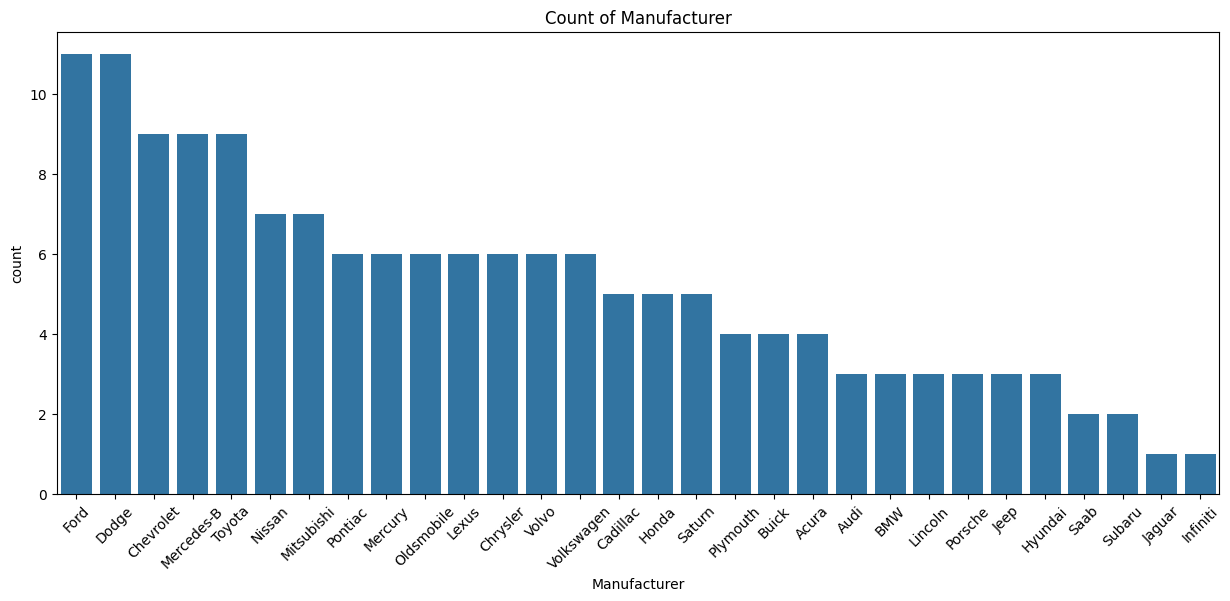

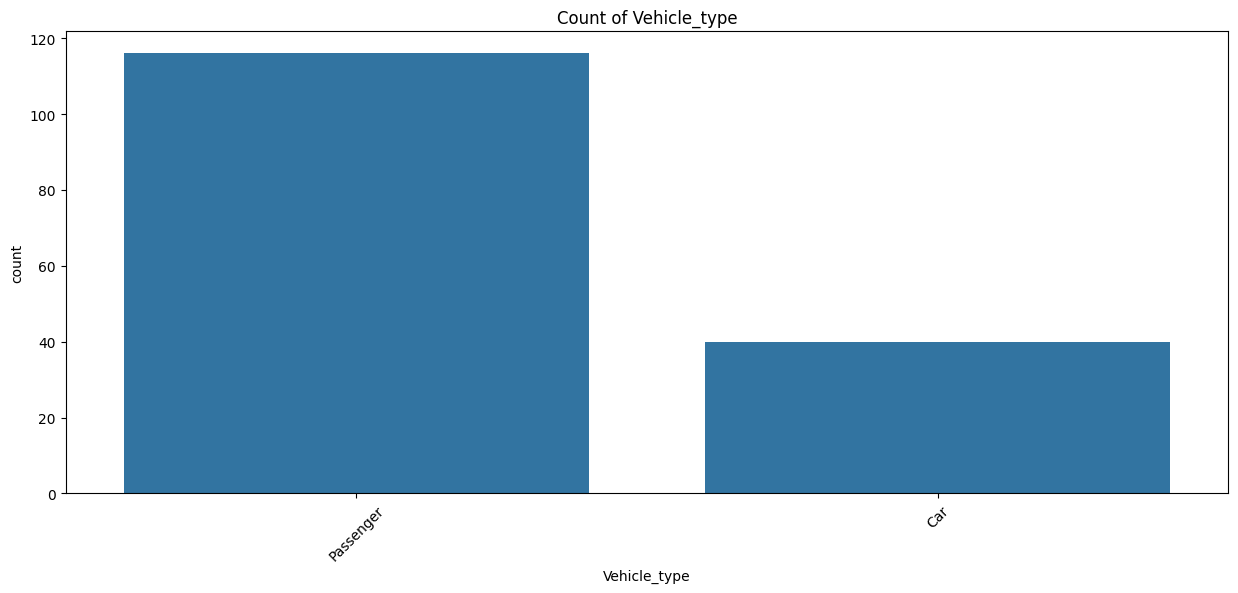

In [16]:
# Categorical Feature Analysis
cat_cols = ["Manufacturer", "Vehicle_type"]

for col in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


Index(['Sales_in_thousands', 'Year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')


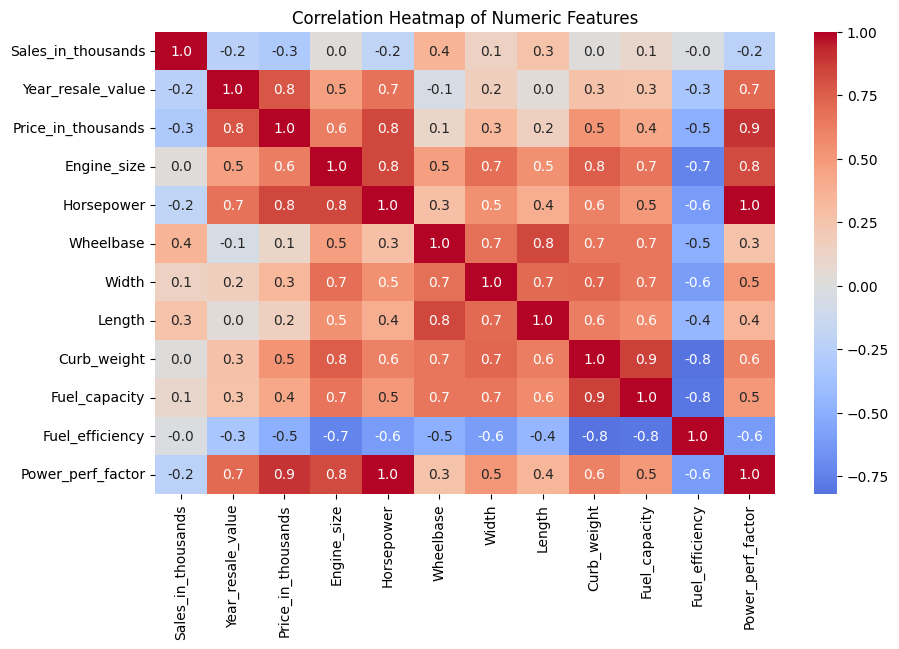

In [17]:
# Bivariate Analysis
# Correlation heatmap for numeric variables

numeric_cols = df.select_dtypes(include=np.number).columns
print(numeric_cols)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, fmt='.1f');
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<Figure size 2000x600 with 0 Axes>

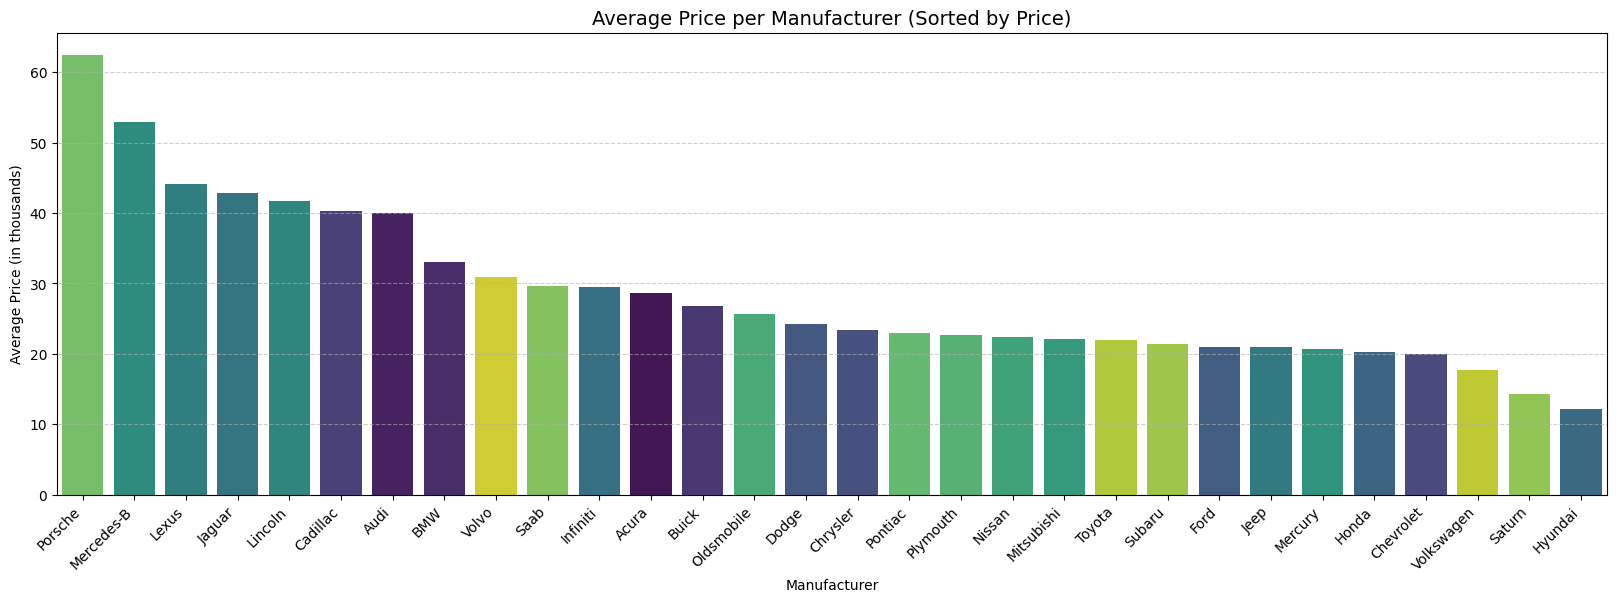

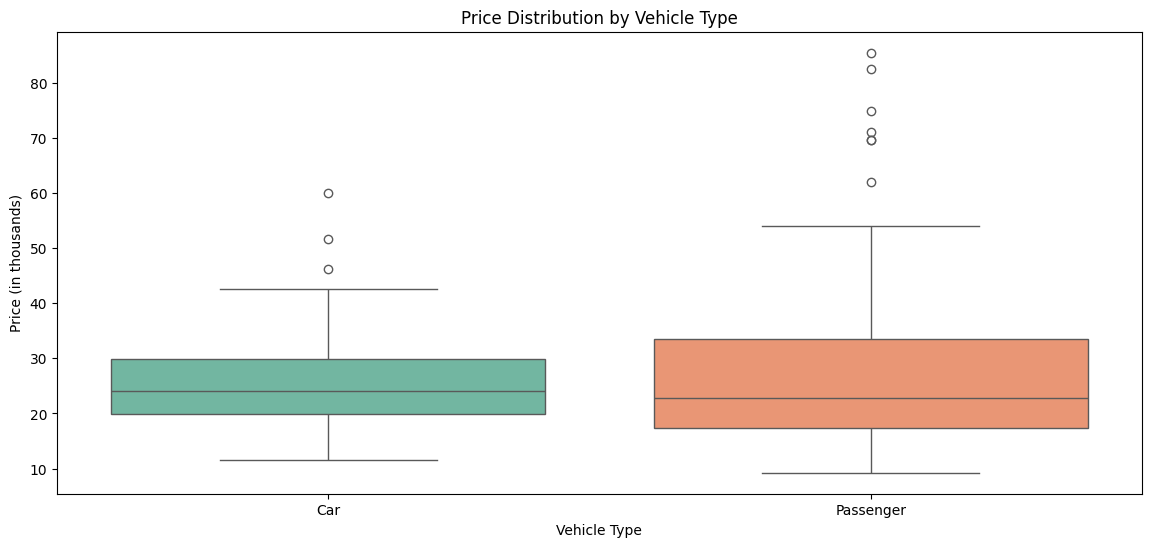

In [18]:
# Price Analysis (Categorical Features)
# Does Manufacturer significantly influence Price
# Which manufacturer has the highest average Price
# Average Price per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by average price
manufacturer_price_df = (df.groupby('Manufacturer', observed=True)['Price_in_thousands']
                         .mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_price_df['Manufacturer']

plt.figure(figsize=(20,6))
# Plotting the pre-sorted DataFrame with explicit order
sns.barplot(
    data=manufacturer_price_df,
    x="Manufacturer",
    y="Price_in_thousands",
    order=manufacturer_order_list,  # guarantees sorting
    hue="Manufacturer",
    legend=False,
    palette='viridis'
);

plt.xticks(rotation=45, ha='right')
plt.title("Average Price per Manufacturer (Sorted by Price)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Price (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are prices linked to Vehicle_Type? (Boxplot for Price Distribution)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Price_in_thousands", hue="Vehicle_type", palette='Set2');
plt.title("Price Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Price (in thousands)")
plt.show()


Selected price-driving features: ['Year_resale_value', 'Engine_size', 'Horsepower', 'Curb_weight', 'Fuel_efficiency', 'Power_perf_factor']


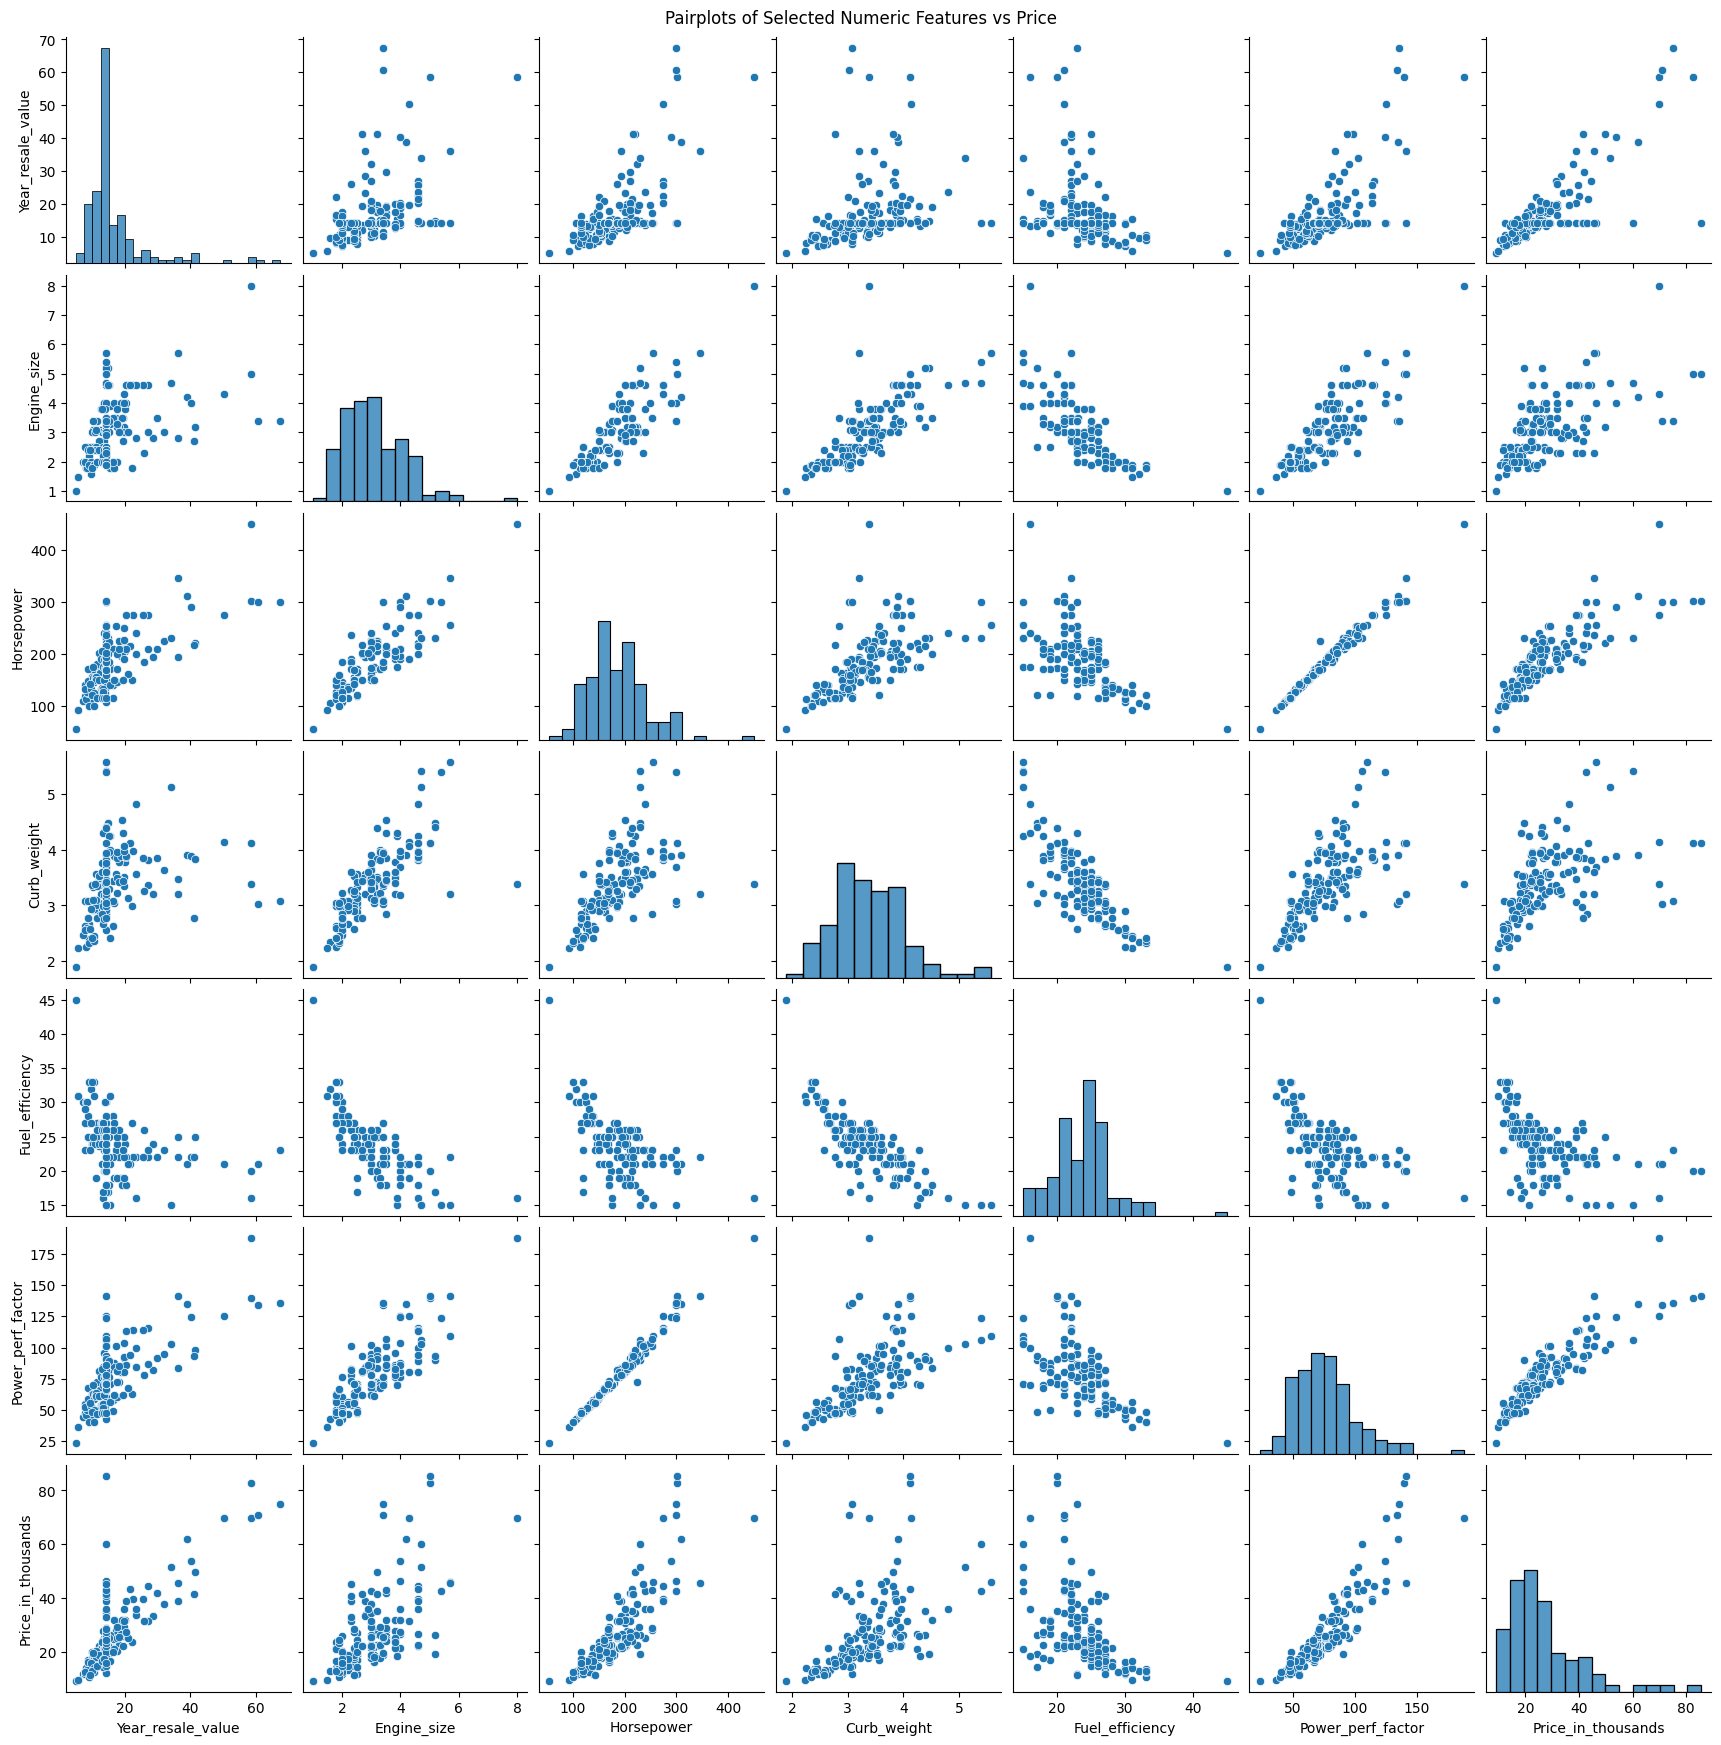

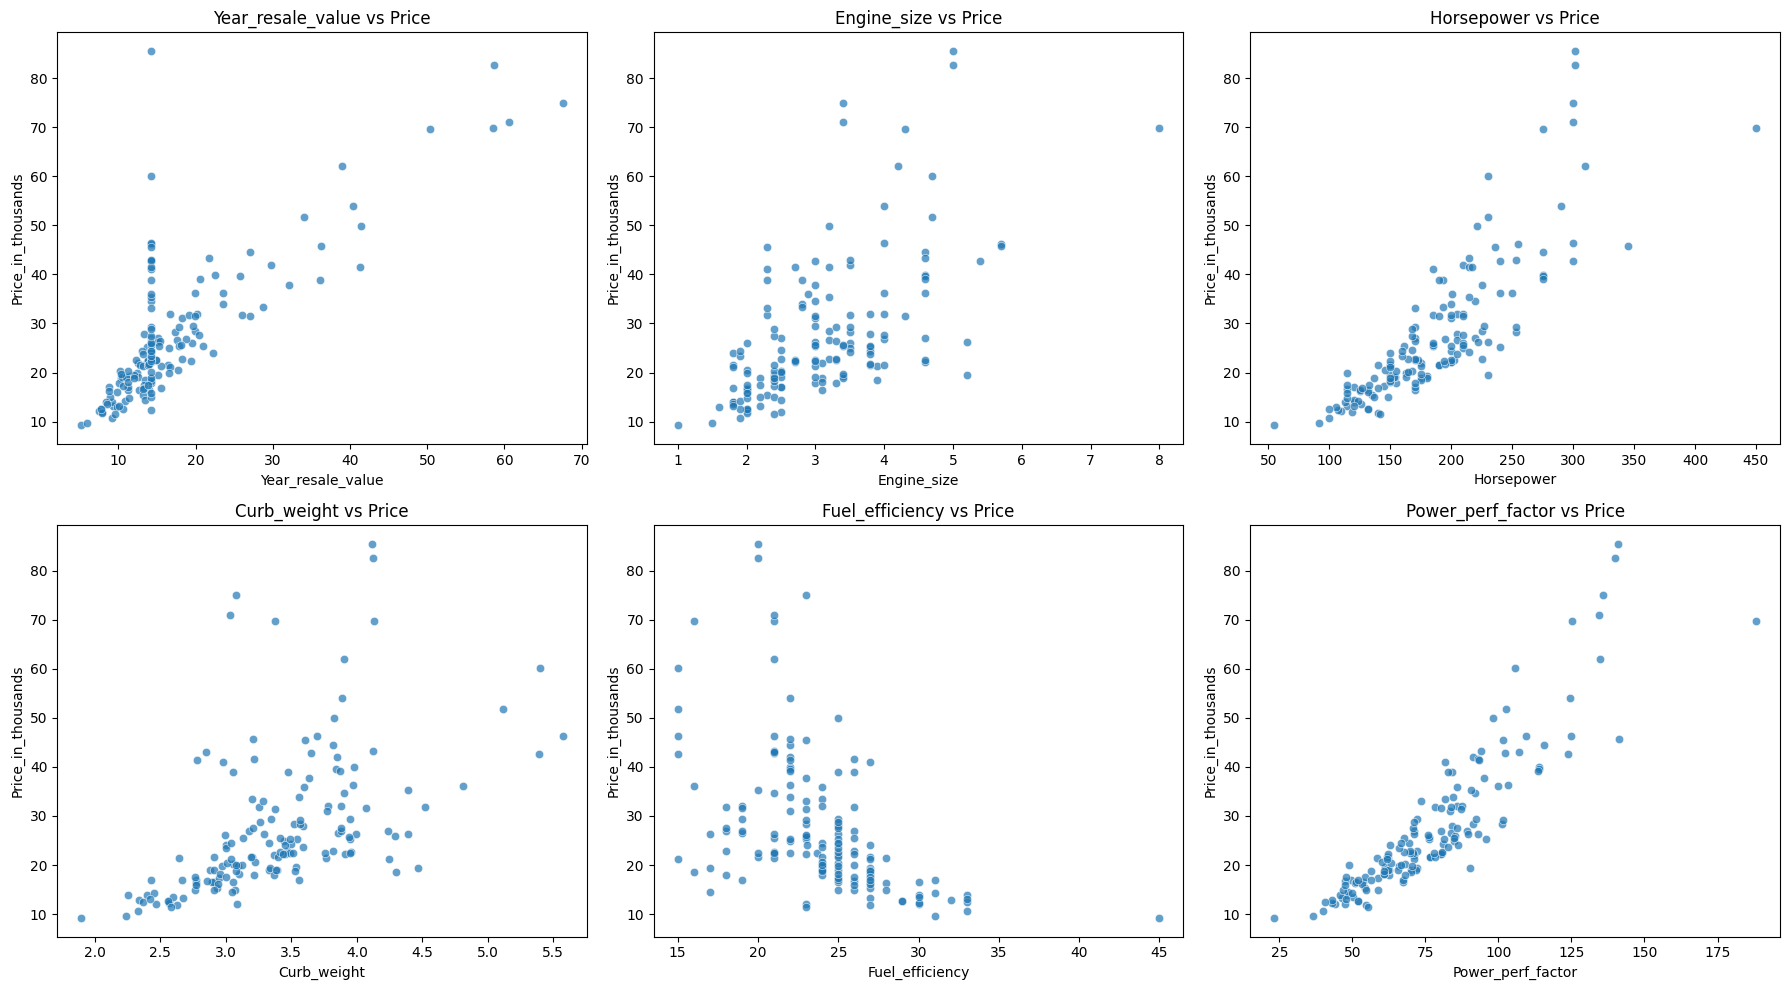

In [19]:
# What features influence car prices the most?

numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr().round(1)         # Correlation matrix

# Extract correlations with Price
price_corr = corr_matrix["Price_in_thousands"].drop("Price_in_thousands")

# Select features with |correlation| >= 0.5
selected_price_features = price_corr[price_corr.abs() >= 0.5].index.tolist()
print("Selected price-driving features:", selected_price_features)

# Pairplot of selected features + Price
sns.pairplot(df[selected_price_features + ["Price_in_thousands"]])
plt.suptitle("Pairplots of Selected Numeric Features vs Price", y=1)
plt.show()

# Scatterplots: all selected features vs Price in one figure
n_features = len(selected_price_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # auto-calc rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(selected_price_features):
    sns.scatterplot(x=feature, y="Price_in_thousands", data=df, ax=axes[i], alpha=0.7)
    axes[i].set_title(f"{feature} vs Price")

# Hide unused axes (if features < grid size)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

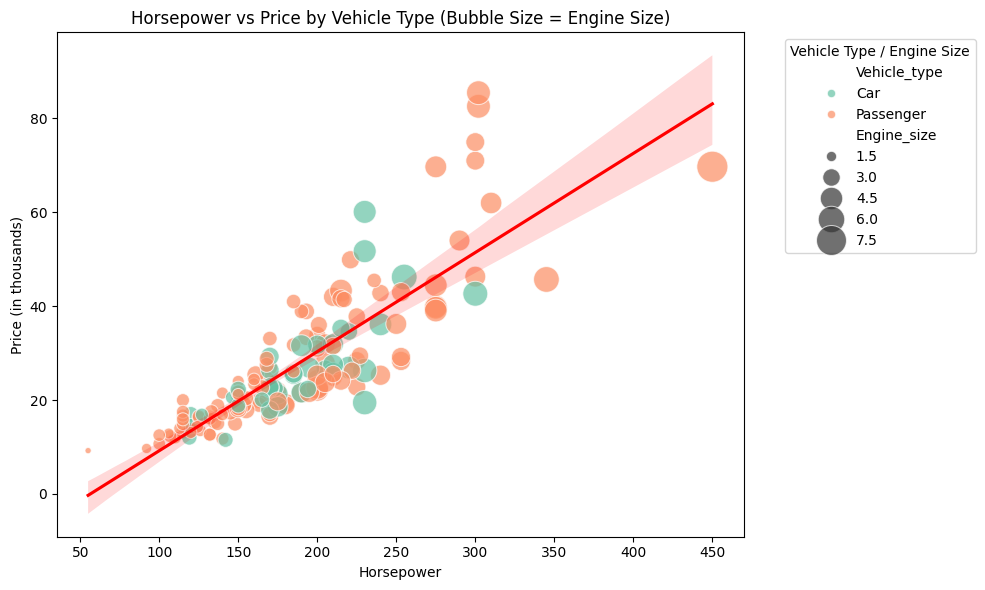

In [20]:
# Do more powerful cars command higher prices?
# Ensure required columns exist
required_cols = ['Horsepower', 'Price_in_thousands', 'Engine_size', 'Vehicle_type']
if all(col in df.columns for col in required_cols):

    # Scatterplot: Horsepower vs Price
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Horsepower',
        y='Price_in_thousands',
        hue='Vehicle_type',       # color by Vehicle Type
        size='Engine_size',       # size by Engine Size
        palette='Set2',
        alpha=0.7,
        sizes=(20, 500)
    )
    
    # Regression line (overall trend)
    sns.regplot(data=df, x='Horsepower', y='Price_in_thousands', scatter=False, color='red')
    
    plt.title("Horsepower vs Price by Vehicle Type (Bubble Size = Engine Size)")
    plt.xlabel("Horsepower")
    plt.ylabel("Price (in thousands)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Vehicle Type / Engine Size")
    plt.tight_layout()
    plt.show()
    

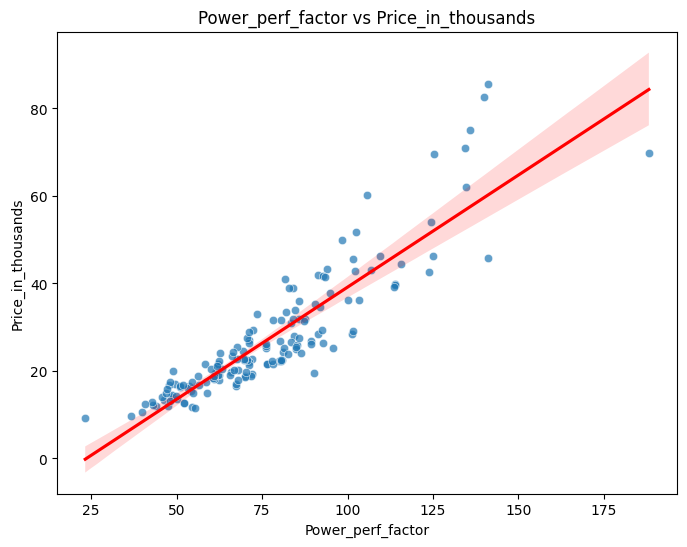

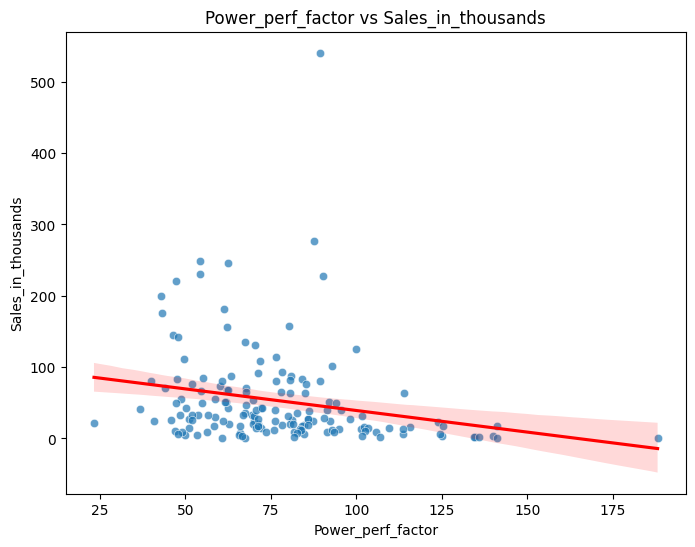

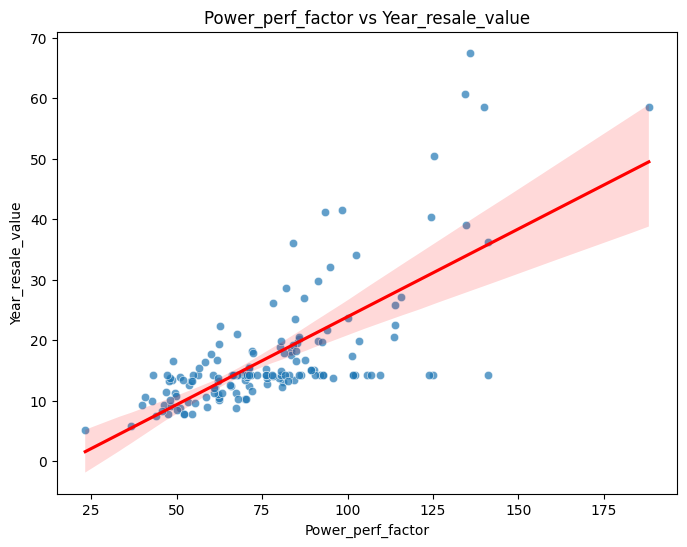

In [21]:
# Power_perf_factor vs. Key Business Metrics
# Addresses: Performance correlation with Price, Sales, and Resale.

# Define target variables
targets = ['Price_in_thousands', 'Sales_in_thousands', 'Year_resale_value']

for target in targets:
    if 'Power_perf_factor' in df.columns and target in df.columns:
        # Scatterplot with regression line
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Power_perf_factor', y=target, alpha=0.7)
        sns.regplot(data=df, x='Power_perf_factor', y=target, scatter=False, color='red')
        plt.title(f"Power_perf_factor vs {target}")
        plt.xlabel("Power_perf_factor")
        plt.ylabel(target)
        plt.show()


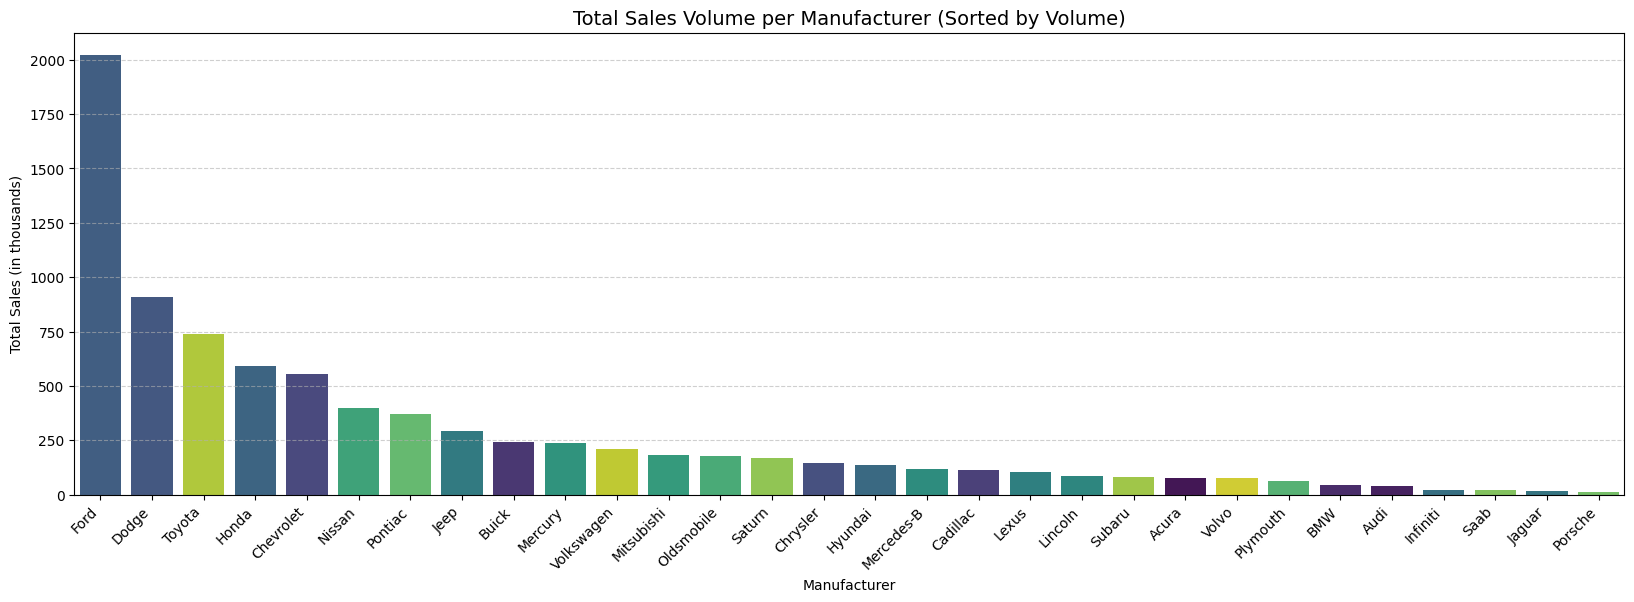

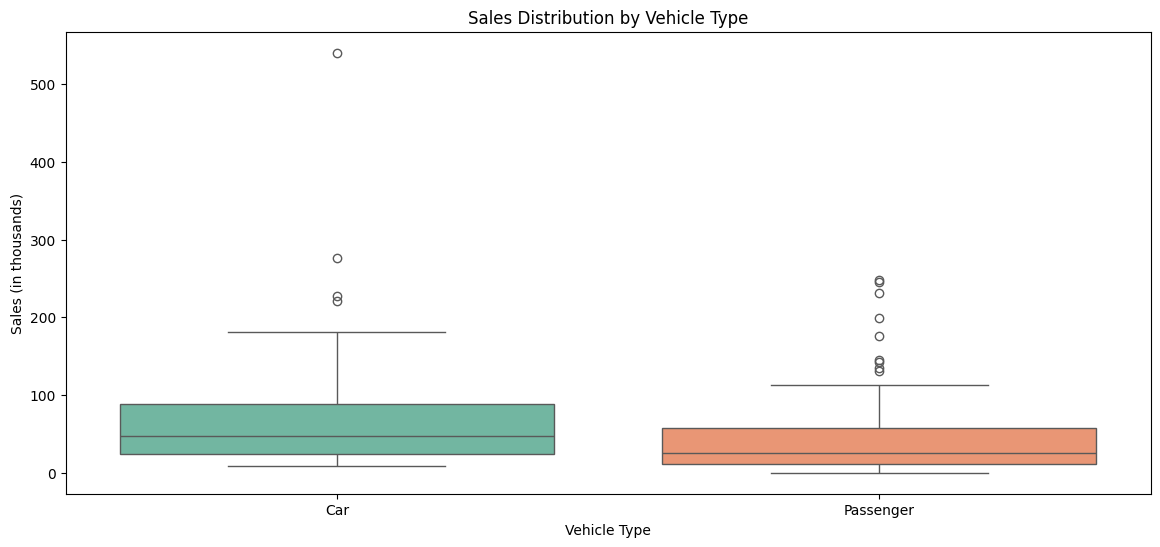

In [22]:
# Sales Analysis (Categorical Features)
# Does Manufacturer significantly influence Sales

# Which manufacturer dominates the sales volume
# Average Sales per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by sales (creates the small, sorted summary table)
manufacturer_sales_df = (df.groupby('Manufacturer', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_sales_df['Manufacturer']

# Plotting the PRE-SORTED DataFrame with explicit order
sns.barplot(
    data=manufacturer_sales_df,
    x="Manufacturer",
    y="Sales_in_thousands",
    order=manufacturer_order_list, # GUARANTEES THE SORTING
    hue="Manufacturer", 
    legend=False,
    palette='viridis' 
)

plt.xticks(rotation=45, ha='right')
plt.title("Total Sales Volume per Manufacturer (Sorted by Volume)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales (in thousands)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are sales linked to Vehicle_Type? (Boxplot for Sales Distribution)
# Vehicle Type vs Sales (Boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Sales_in_thousands", hue="Vehicle_type", palette='Set2')
plt.xticks()
plt.title("Sales Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Sales (in thousands)")
plt.show()


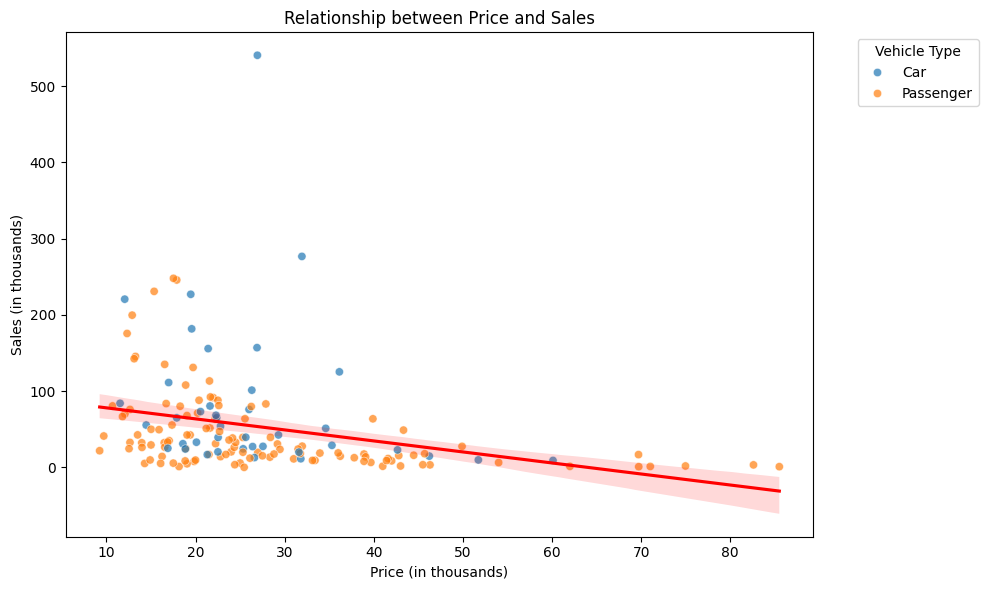

In [23]:
# What is the relationship between Price and Sales

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', hue='Vehicle_type',alpha=0.7)
sns.regplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', scatter=False, color='red')
plt.title("Relationship between Price and Sales")
plt.xlabel("Price (in thousands)")
plt.ylabel("Sales (in thousands)")
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

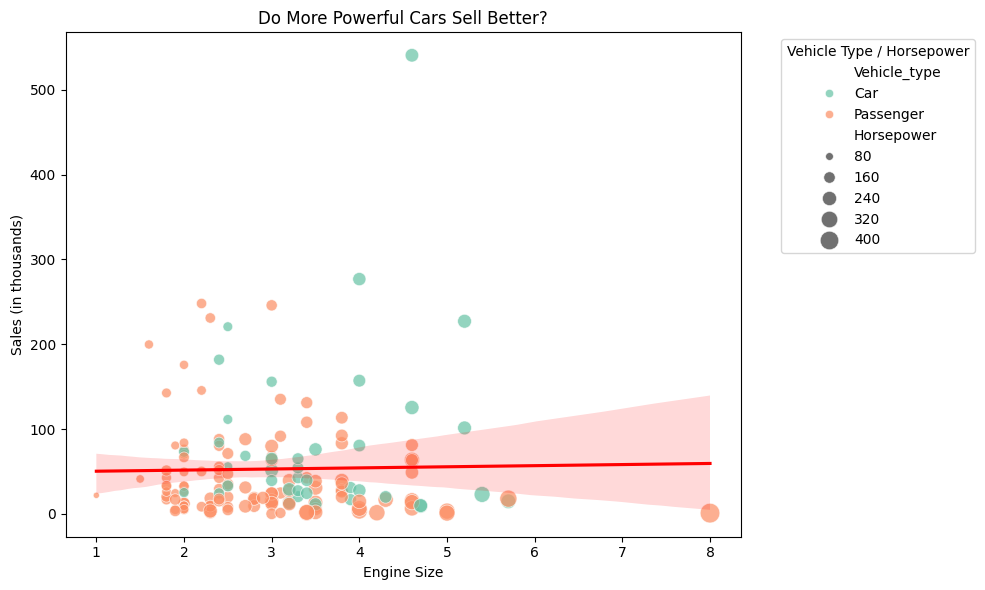

In [24]:
# Do more powerful cars sell better than smaller ones?
# Check required columns exist
required_cols = ['Engine_size', 'Horsepower', 'Sales_in_thousands', 'Vehicle_type']
if all(col in df.columns for col in required_cols):

    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df,
        x='Engine_size',
        y='Sales_in_thousands',
        size='Horsepower',       # bubble size represents horsepower
        hue='Vehicle_type',      # color represents vehicle type
        alpha=0.7,
        sizes=(20, 200),
        palette='Set2'
    )
    
    # Regression line (overall trend)
    sns.regplot(data=df, x='Engine_size', y='Sales_in_thousands', scatter=False, color='red')
    
    plt.title("Do More Powerful Cars Sell Better?")
    plt.xlabel("Engine Size")
    plt.ylabel("Sales (in thousands)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Vehicle Type / Horsepower")
    plt.tight_layout()
    plt.show()
    

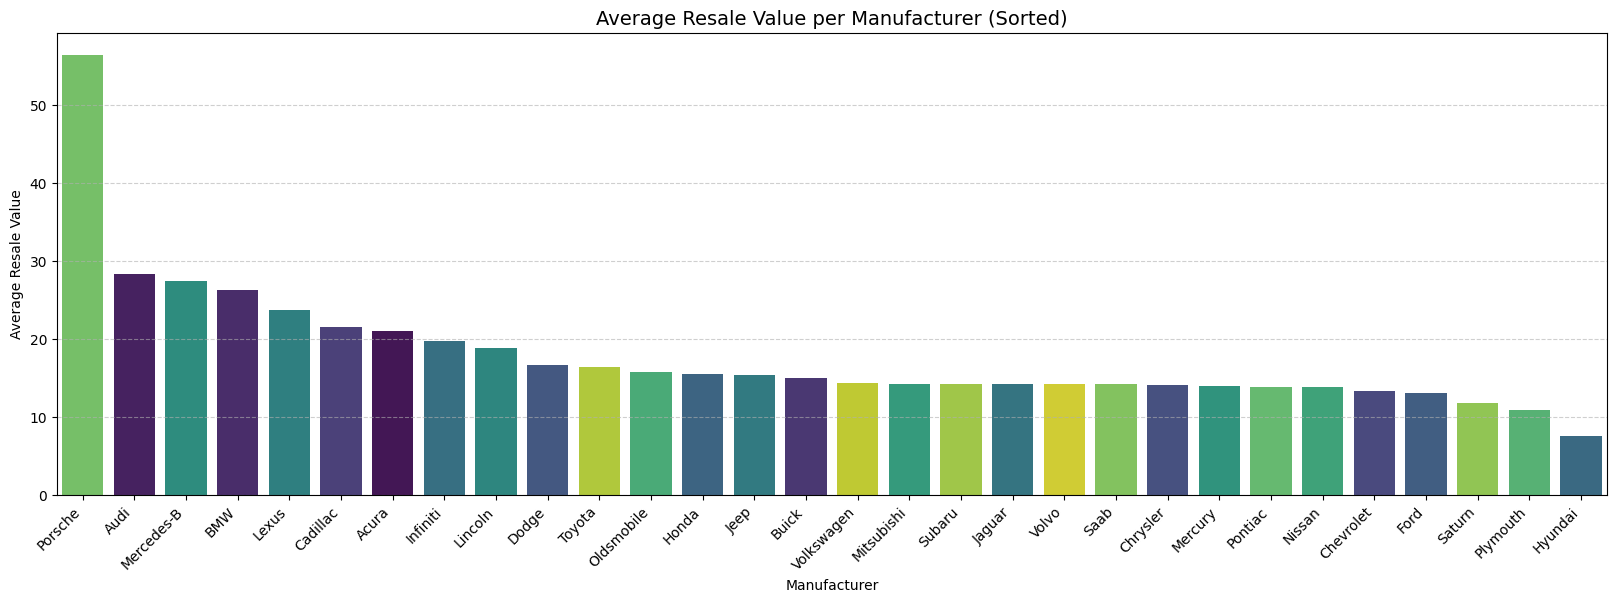

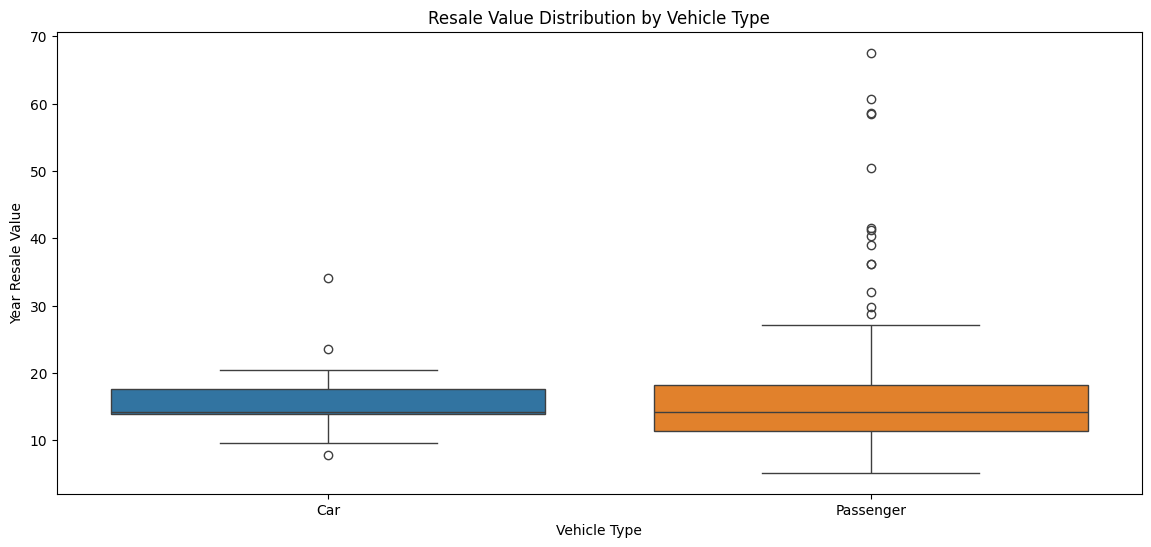

In [25]:
# Resales Analysis (Categorical Features)
# Does Manufacturer significantly influence Resales

# Which manufacturer dominates the resale values
# Average Resales Value per Manufacturer (Barplot)
plt.figure(figsize=(20,6))

# Aggregate and sort by sales (creates the small, sorted summary table)
manufacturer_resale_df = (df.groupby('Manufacturer', observed=True)['Year_resale_value'].mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_resale_df['Manufacturer']

# Plotting the PRE-SORTED DataFrame with explicit order
sns.barplot(
    data=manufacturer_resale_df,
    x="Manufacturer",
    y="Year_resale_value",
    order=manufacturer_order_list, # GUARANTEES THE SORTING
    hue="Manufacturer", 
    legend=False,
    palette='viridis' 
)

plt.xticks(rotation=45, ha='right')
plt.title("Average Resale Value per Manufacturer (Sorted)", fontsize=14)
plt.xlabel("Manufacturer")
plt.ylabel("Average Resale Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Are resales linked to Vehicle_Type? (Boxplot for ReSale Distribution)
# Vehicle Type vs Sales (Boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Vehicle_type", y="Year_resale_value", hue="Vehicle_type")
plt.xticks()
plt.title("Resale Value Distribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Year Resale Value")
plt.show()
